<a href="https://www.kaggle.com/code/alexeybulichev/house-prices?scriptVersionId=190642335" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Описание проекта

**Описание датасета**

**Описание файлов**

* train.csv - обучающий набор данных

* test.csv - тестовый набор данных

* sample_submission.csv - пример отправки результатов линейной регрессии по году и месяцу продажи, площади участка и количеству спален

**Поля данных**

* SalePrice - цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
* MSSubClass: Класс здания
* MSZoning: Общая классификация зон
* LotFrontage: Линейные футы улицы, подключенные к собственности
* LotArea: Размер участка в квадратных футах
* Street: Тип доступа к дороге
* Alley: Тип доступа к переулку
* LotShape: Общая форма собственности
* LandContour: Рельефность участка
* Utilities: Тип доступных коммунальных услуг
* LotConfig: Конфигурация участка
* LandSlope: Уклон участка
* Neighborhood: Физическое расположение в пределах города Эймс
* Condition1: Близость к главной дороге или железной дороге
* Condition2: Близость к главной дороге или железной дороге (если есть второй объект)
* BldgType: Тип жилья
* HouseStyle: Стиль жилья
* OverallQual: Общее качество материалов и отделки
* OverallCond: Общий рейтинг состояния
* YearBuilt: Дата первоначального строительства
* YearRemodAdd: Дата ремонта
* RoofStyle: Тип крыши
* RoofMatl: Материал крыши
* Exterior1st: Внешнее покрытие дома
* Exterior2nd: Внешнее покрытие дома (если используется более одного материала)
* MasVnrType: Тип кирпичного шпона
* MasVnrArea: Площадь кирпичного шпона в квадратных футах
* ExterQual: Качество внешнего материала
* ExterCond: Текущее состояние внешнего материала
* Foundation: Тип фундамента
* BsmtQual: Высота подвала
* BsmtCond: Общее состояние подвала
* BsmtExposure: Наличие выходных или садовых стен подвала
* BsmtFinType1: Качество отделки подвала
* BsmtFinSF1: Площадь отделки подвала типа 1 в квадратных футах
* BsmtFinType2: Качество второй отделки подвала (если есть)
* BsmtFinSF2: Площадь отделки подвала типа 2 в квадратных футах
* BsmtUnfSF: Неотделанная площадь подвала в квадратных футах
* TotalBsmtSF: Общая площадь подвала в квадратных футах
* Heating: Тип отопления
* HeatingQC: Качество и состояние отопления
* CentralAir: Центральное кондиционирование
* Electrical: Электрическая система
* 1stFlrSF: Площадь первого этажа в квадратных футах
* 2ndFlrSF: Площадь второго этажа в квадратных футах
* LowQualFinSF: Площадь отделки низкого качества (все этажи)
* GrLivArea: Площадь жилого пространства выше уровня земли в квадратных футах
* BsmtFullBath: Полные ванные комнаты в подвале
* BsmtHalfBath: Половинные ванные комнаты в подвале
* FullBath: Полные ванные комнаты выше уровня земли
* HalfBath: Половинные ванные комнаты выше уровня земли
* Bedroom: Количество спален выше уровня подвала
* Kitchen: Количество кухонь
* KitchenQual: Качество кухни
* TotRmsAbvGrd: Общее количество комнат выше уровня земли (не включает ванные комнаты)
* Functional: Рейтинг функциональности дома
* Fireplaces: Количество каминов
* FireplaceQu: Качество камина
* GarageType: Расположение гаража
* GarageYrBlt: Год постройки гаража
* GarageFinish: Внутренняя отделка гаража
* GarageCars: Размер гаража в автомобиле-местах
* GarageArea: Размер гаража в квадратных футах
* GarageQual: Качество гаража
* GarageCond: Состояние гаража
* PavedDrive: Асфальтированная подъездная дорога
* WoodDeckSF: Площадь деревянной террасы в квадратных футах
* OpenPorchSF: Площадь открытого крыльца в квадратных футах
* EnclosedPorch: Площадь закрытого крыльца в квадратных футах
* 3SsnPorch: Площадь трехсезонного крыльца в квадратных футах
* ScreenPorch: Площадь крыльца с сеткой в квадратных футах
* PoolArea: Площадь бассейна в квадратных футах
* PoolQC: Качество бассейна
* Fence: Качество забора
* MiscFeature: Различные особенности, не охваченные другими категориями
* MiscVal: Стоимость различных особенностей в долларах
* MoSold: Месяц продажи
* YrSold: Год продажи
* SaleType: Тип продажи
* SaleCondition: Состояние продажи








In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import RandomizedSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (OneHotEncoder,
                                   OrdinalEncoder,
                                   StandardScaler,
                                   LabelEncoder,
                                   MinMaxScaler)

from sklearn.tree import  DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, make_scorer

import warnings

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
target = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
#  Приводим все буквы к нижнему регистру
train = train.applymap(lambda x: str(x).strip().lower() if isinstance(x, str) else x)
train.columns = train.columns.str.lower()

test = test.applymap(lambda x: str(x).strip().lower() if isinstance(x, str) else x)
test.columns = test.columns.str.lower()

target = target.applymap(lambda x: str(x).strip().lower() if isinstance(x, str) else x)
target.columns = target.columns.str.lower()

/tmp/ipykernel_18/1463755528.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train = train.applymap(lambda x: str(x).strip().lower() if isinstance(x, str) else x)
/tmp/ipykernel_18/1463755528.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test = test.applymap(lambda x: str(x).strip().lower() if isinstance(x, str) else x)
/tmp/ipykernel_18/1463755528.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  target = target.applymap(lambda x: str(x).strip().lower() if isinstance(x, str) else x)


In [4]:
test = test.merge(target, on='id')

In [5]:
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,rl,65.0,8450,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,12,2008,wd,normal,250000


In [6]:
test.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1461,20,rh,80.0,11622,pave,NaN,reg,lvl,allpub,...,0,NaN,mnprv,NaN,0,6,2010,wd,normal,169277.052498
1,1462,20,rl,81.0,14267,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,gar2,12500,6,2010,wd,normal,187758.393989
2,1463,60,rl,74.0,13830,pave,NaN,ir1,lvl,allpub,...,0,NaN,mnprv,NaN,0,3,2010,wd,normal,183583.683570
3,1464,60,rl,78.0,9978,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,6,2010,wd,normal,179317.477511
4,1465,120,rl,43.0,5005,pave,NaN,ir1,hls,allpub,...,0,NaN,NaN,NaN,0,1,2010,wd,normal,150730.079977


Количество пропусков в train:
poolqc          1453
miscfeature     1406
alley           1369
fence           1179
masvnrtype       872
fireplacequ      690
lotfrontage      259
garagetype        81
garageyrblt       81
garagefinish      81
garagequal        81
garagecond        81
bsmtfintype2      38
bsmtexposure      38
bsmtfintype1      37
bsmtcond          37
bsmtqual          37
masvnrarea         8
electrical         1
dtype: int64


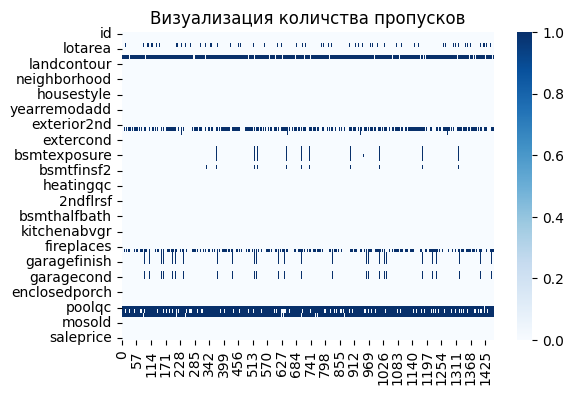

In [7]:
print(f'Количество пропусков в train:\n{train.isna().sum()[train.isna().sum() > 0].sort_values(ascending=False)}')
plt.figure(figsize=(6, 4))
sns.heatmap(train.isna().transpose(), cmap='Blues')
plt.title('Визуализация количства пропусков')
plt.show()

Количество пропусков в test:
poolqc          1456
miscfeature     1408
alley           1352
fence           1169
masvnrtype       894
fireplacequ      730
lotfrontage      227
garagecond        78
garageyrblt       78
garagequal        78
garagefinish      78
garagetype        76
bsmtcond          45
bsmtexposure      44
bsmtqual          44
bsmtfintype1      42
bsmtfintype2      42
masvnrarea        15
mszoning           4
bsmtfullbath       2
bsmthalfbath       2
functional         2
utilities          2
garagecars         1
garagearea         1
totalbsmtsf        1
kitchenqual        1
bsmtunfsf          1
bsmtfinsf2         1
bsmtfinsf1         1
exterior2nd        1
exterior1st        1
saletype           1
dtype: int64


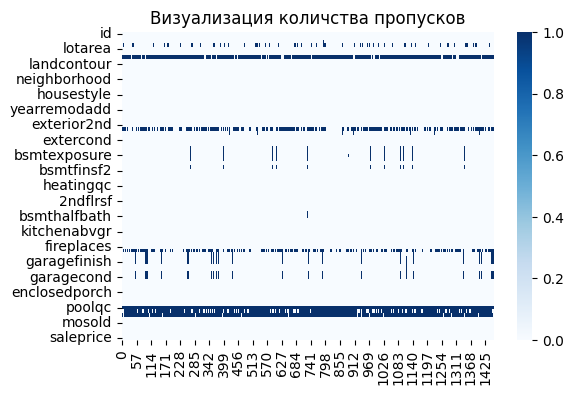

In [8]:
print(f'Количество пропусков в test:\n{test.isna().sum()[test.isna().sum() > 0].sort_values(ascending=False)}')
plt.figure(figsize=(6, 4))
sns.heatmap(test.isna().transpose(), cmap='Blues')
plt.title('Визуализация количства пропусков')
plt.show()

In [9]:
train = train.drop(['id', 'poolqc', 'miscfeature', 'alley', 'fence', 'masvnrtype', 'fireplacequ', 'lotfrontage'], axis= 1)
test = test.drop(['id', 'poolqc', 'miscfeature', 'alley', 'fence', 'masvnrtype', 'fireplacequ', 'lotfrontage'], axis= 1)


In [10]:
# Определяем количественные и категориальные признаки
quantitative_features = train.select_dtypes(include=['number']).columns.tolist()
categorical_features = train.select_dtypes(include=['object', 'category']).columns.tolist()

# Разделяем данные на количественные и категориальные
num_col = train[quantitative_features].columns
cat_col = train[categorical_features].columns

Количество пропусков в train:
garagetype      81
garageyrblt     81
garagefinish    81
garagequal      81
garagecond      81
bsmtexposure    38
bsmtfintype2    38
bsmtqual        37
bsmtcond        37
bsmtfintype1    37
masvnrarea       8
electrical       1
dtype: int64


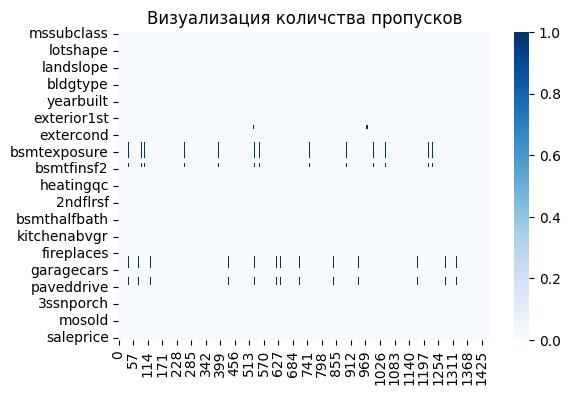

In [11]:
print(f'Количество пропусков в train:\n{train.isna().sum()[train.isna().sum() > 0].sort_values(ascending=False)}')
plt.figure(figsize=(6, 4))
sns.heatmap(train.isna().transpose(), cmap='Blues')
plt.title('Визуализация количства пропусков')
plt.show()

Количество пропусков в test:
garagecond      78
garagequal      78
garageyrblt     78
garagefinish    78
garagetype      76
bsmtcond        45
bsmtqual        44
bsmtexposure    44
bsmtfintype1    42
bsmtfintype2    42
masvnrarea      15
mszoning         4
bsmtfullbath     2
bsmthalfbath     2
functional       2
utilities        2
garagecars       1
garagearea       1
totalbsmtsf      1
kitchenqual      1
bsmtunfsf        1
bsmtfinsf2       1
bsmtfinsf1       1
exterior2nd      1
exterior1st      1
saletype         1
dtype: int64


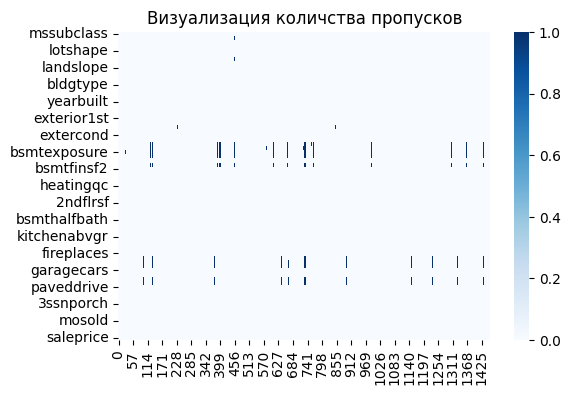

In [12]:
print(f'Количество пропусков в test:\n{test.isna().sum()[test.isna().sum() > 0].sort_values(ascending=False)}')
plt.figure(figsize=(6, 4))
sns.heatmap(test.isna().transpose(), cmap='Blues')
plt.title('Визуализация количства пропусков')
plt.show()

Количество пропусков в train:
Series([], dtype: int64)


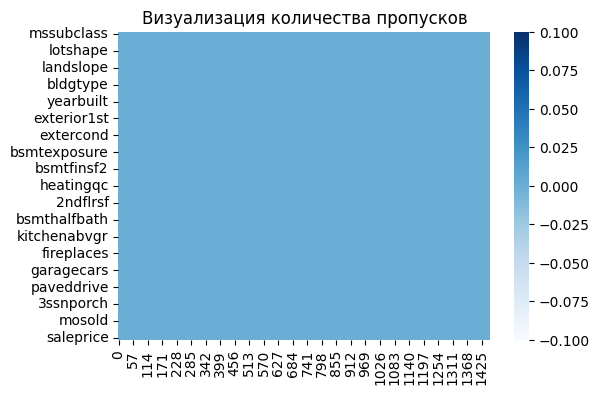

In [13]:
for column in train.columns:
    most_frequent_value = train[column].mode()[0]  # Находим модальное значение для каждого столбца
    train[column] = train[column].fillna(most_frequent_value)  # Заполняем пропуски модальным значением

# Проверяем, что пропуски были заменены
print(f'Количество пропусков в train:\n{train.isna().sum()[train.isna().sum() > 0].sort_values(ascending=False)}')

plt.figure(figsize=(6, 4))
sns.heatmap(train.isna().transpose(), cmap='Blues')
plt.title('Визуализация количества пропусков')
plt.show()


Количество пропусков в train:
Series([], dtype: int64)


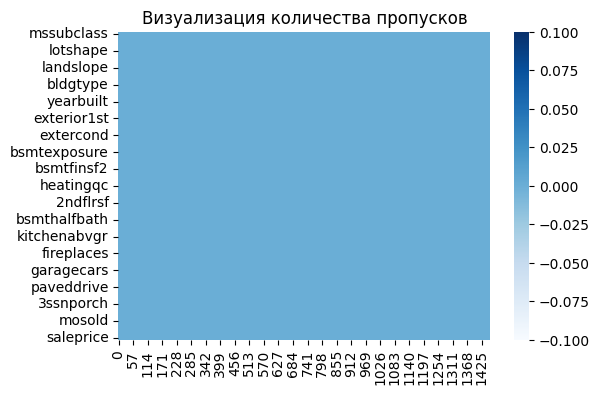

In [14]:
for column in test.columns:
    most_frequent_value = train[column].mode()[0]  # Находим модальное значение для каждого столбца
    test[column] = test[column].fillna(most_frequent_value)  # Заполняем пропуски модальным значением

# Проверяем, что пропуски были заменены
print(f'Количество пропусков в train:\n{test.isna().sum()[test.isna().sum() > 0].sort_values(ascending=False)}')

plt.figure(figsize=(6, 4))
sns.heatmap(test.isna().transpose(), cmap='Blues')
plt.title('Визуализация количества пропусков')
plt.show()

In [15]:
#Функция для удаления дубликатов
def duplicat(data):
    print(data[data.duplicated()])
    print(f'размер df с дубликатами {data.shape}')
    print(f'Количество строк дубликатов: {data.duplicated ().sum()}')
    print(f'Процентное соотноешение пропусков: {round(data.duplicated().sum() / len(data) *100, 2)}%')
    data = data.drop_duplicates().reset_index(drop=True)
    print(f'размер df без дубликатов {data.shape}')
    return data.head()

In [16]:
duplicat(train)

Empty DataFrame
Columns: [mssubclass, mszoning, lotarea, street, lotshape, landcontour, utilities, lotconfig, landslope, neighborhood, condition1, condition2, bldgtype, housestyle, overallqual, overallcond, yearbuilt, yearremodadd, roofstyle, roofmatl, exterior1st, exterior2nd, masvnrarea, exterqual, extercond, foundation, bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfinsf1, bsmtfintype2, bsmtfinsf2, bsmtunfsf, totalbsmtsf, heating, heatingqc, centralair, electrical, 1stflrsf, 2ndflrsf, lowqualfinsf, grlivarea, bsmtfullbath, bsmthalfbath, fullbath, halfbath, bedroomabvgr, kitchenabvgr, kitchenqual, totrmsabvgrd, functional, fireplaces, garagetype, garageyrblt, garagefinish, garagecars, garagearea, garagequal, garagecond, paveddrive, wooddecksf, openporchsf, enclosedporch, 3ssnporch, screenporch, poolarea, miscval, mosold, yrsold, saletype, salecondition, saleprice]
Index: []

[0 rows x 73 columns]
размер df с дубликатами (1460, 73)
Количество строк дубликатов: 0
Процентное соотн

,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,60,rl,8450,pave,reg,lvl,allpub,inside,gtl,collgcr,...,0,0,0,0,0,2,2008,wd,normal,208500
1,20,rl,9600,pave,reg,lvl,allpub,fr2,gtl,veenker,...,0,0,0,0,0,5,2007,wd,normal,181500
2,60,rl,11250,pave,ir1,lvl,allpub,inside,gtl,collgcr,...,0,0,0,0,0,9,2008,wd,normal,223500
3,70,rl,9550,pave,ir1,lvl,allpub,corner,gtl,crawfor,...,272,0,0,0,0,2,2006,wd,abnorml,140000
4,60,rl,14260,pave,ir1,lvl,allpub,fr2,gtl,noridge,...,0,0,0,0,0,12,2008,wd,normal,250000


In [17]:
duplicat(test)

Empty DataFrame
Columns: [mssubclass, mszoning, lotarea, street, lotshape, landcontour, utilities, lotconfig, landslope, neighborhood, condition1, condition2, bldgtype, housestyle, overallqual, overallcond, yearbuilt, yearremodadd, roofstyle, roofmatl, exterior1st, exterior2nd, masvnrarea, exterqual, extercond, foundation, bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1, bsmtfinsf1, bsmtfintype2, bsmtfinsf2, bsmtunfsf, totalbsmtsf, heating, heatingqc, centralair, electrical, 1stflrsf, 2ndflrsf, lowqualfinsf, grlivarea, bsmtfullbath, bsmthalfbath, fullbath, halfbath, bedroomabvgr, kitchenabvgr, kitchenqual, totrmsabvgrd, functional, fireplaces, garagetype, garageyrblt, garagefinish, garagecars, garagearea, garagequal, garagecond, paveddrive, wooddecksf, openporchsf, enclosedporch, 3ssnporch, screenporch, poolarea, miscval, mosold, yrsold, saletype, salecondition, saleprice]
Index: []

[0 rows x 73 columns]
размер df с дубликатами (1459, 73)
Количество строк дубликатов: 0
Процентное соотн

,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,20,rh,11622,pave,reg,lvl,allpub,inside,gtl,names,...,0,0,120,0,0,6,2010,wd,normal,169277.052498
1,20,rl,14267,pave,ir1,lvl,allpub,corner,gtl,names,...,0,0,0,0,12500,6,2010,wd,normal,187758.393989
2,60,rl,13830,pave,ir1,lvl,allpub,inside,gtl,gilbert,...,0,0,0,0,0,3,2010,wd,normal,183583.683570
3,60,rl,9978,pave,ir1,lvl,allpub,inside,gtl,gilbert,...,0,0,0,0,0,6,2010,wd,normal,179317.477511
4,120,rl,5005,pave,ir1,hls,allpub,inside,gtl,stonebr,...,0,0,144,0,0,1,2010,wd,normal,150730.079977


In [18]:
for i in num_col:
    train[i] = train[i].astype('int')
    test[i] = test[i].astype('int')

In [19]:
for i in cat_col:
    train[i] = train[i].astype('category')
    test[i] = test[i].astype('category')

In [20]:
for i in cat_col:
    print(f"Столбец: {i}")
    print(train[i].unique())
    print('_-'*50)
    print()

Столбец: mszoning
['rl', 'rm', 'c (all)', 'fv', 'rh']
Categories (5, object): ['c (all)', 'fv', 'rh', 'rl', 'rm']
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

Столбец: street
['pave', 'grvl']
Categories (2, object): ['grvl', 'pave']
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

Столбец: lotshape
['reg', 'ir1', 'ir2', 'ir3']
Categories (4, object): ['ir1', 'ir2', 'ir3', 'reg']
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

Столбец: landcontour
['lvl', 'bnk', 'low', 'hls']
Categories (4, object): ['bnk', 'hls', 'low', 'lvl']
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

Столбец: utilities
['allpub', 'nosewa']
Categories (2, object): ['allpub', 'nosewa']
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

Столбец: lotco

# Анализ

In [21]:
def hist_data(data, num_col):
    # Convert inf values to NaN explicitly
    data = data.replace([float('inf'), float('-inf')], pd.NA)
    
    num_features = len(num_col)
    num_columns = 3
    num_rows = (num_features // num_columns) + (num_features % num_columns)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))

    for i, feature in enumerate(num_col):
        row = i // num_columns
        col = i % num_columns
        sns.histplot(x=feature, data=data, ax=axes[row, col])
        axes[row, col].set_title(f'Гистограмма для {feature}')

    for j in range(i + 1, num_rows * num_columns):
       fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

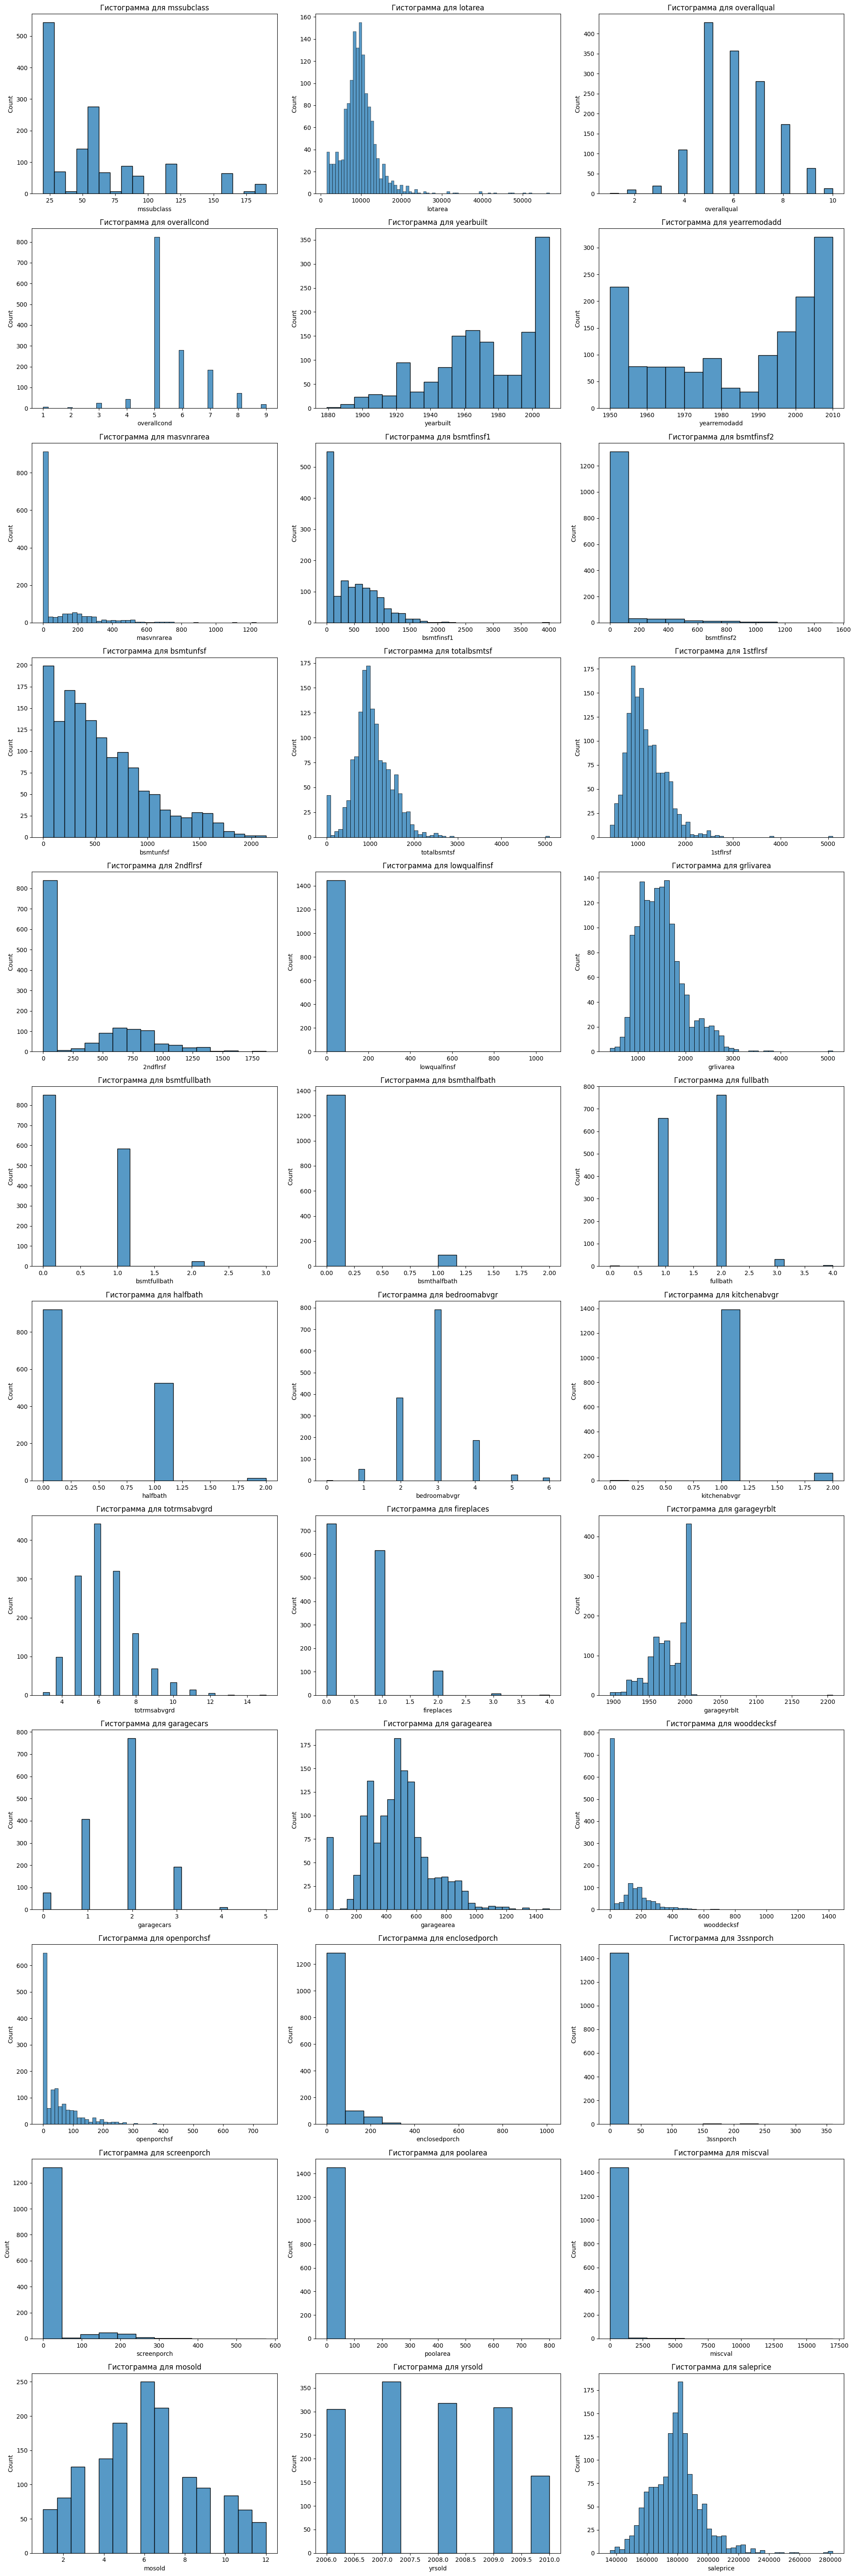

In [22]:
hist_data(test, num_col)

In [23]:
def box_data(data, num_col):
    num_features = len(num_col)
    num_columns = 3
    num_rows = (num_features // num_columns) + (num_features % num_columns)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))


    for i, feature in enumerate(num_col):
        row = i // num_columns
        col = i % num_columns
        sns.boxplot(x=feature, data=data, ax=axes[row, col])
        axes[row, col].set_title(f'Гистограмма для {feature}')

    for j in range(i + 1, num_rows * num_columns):
       fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

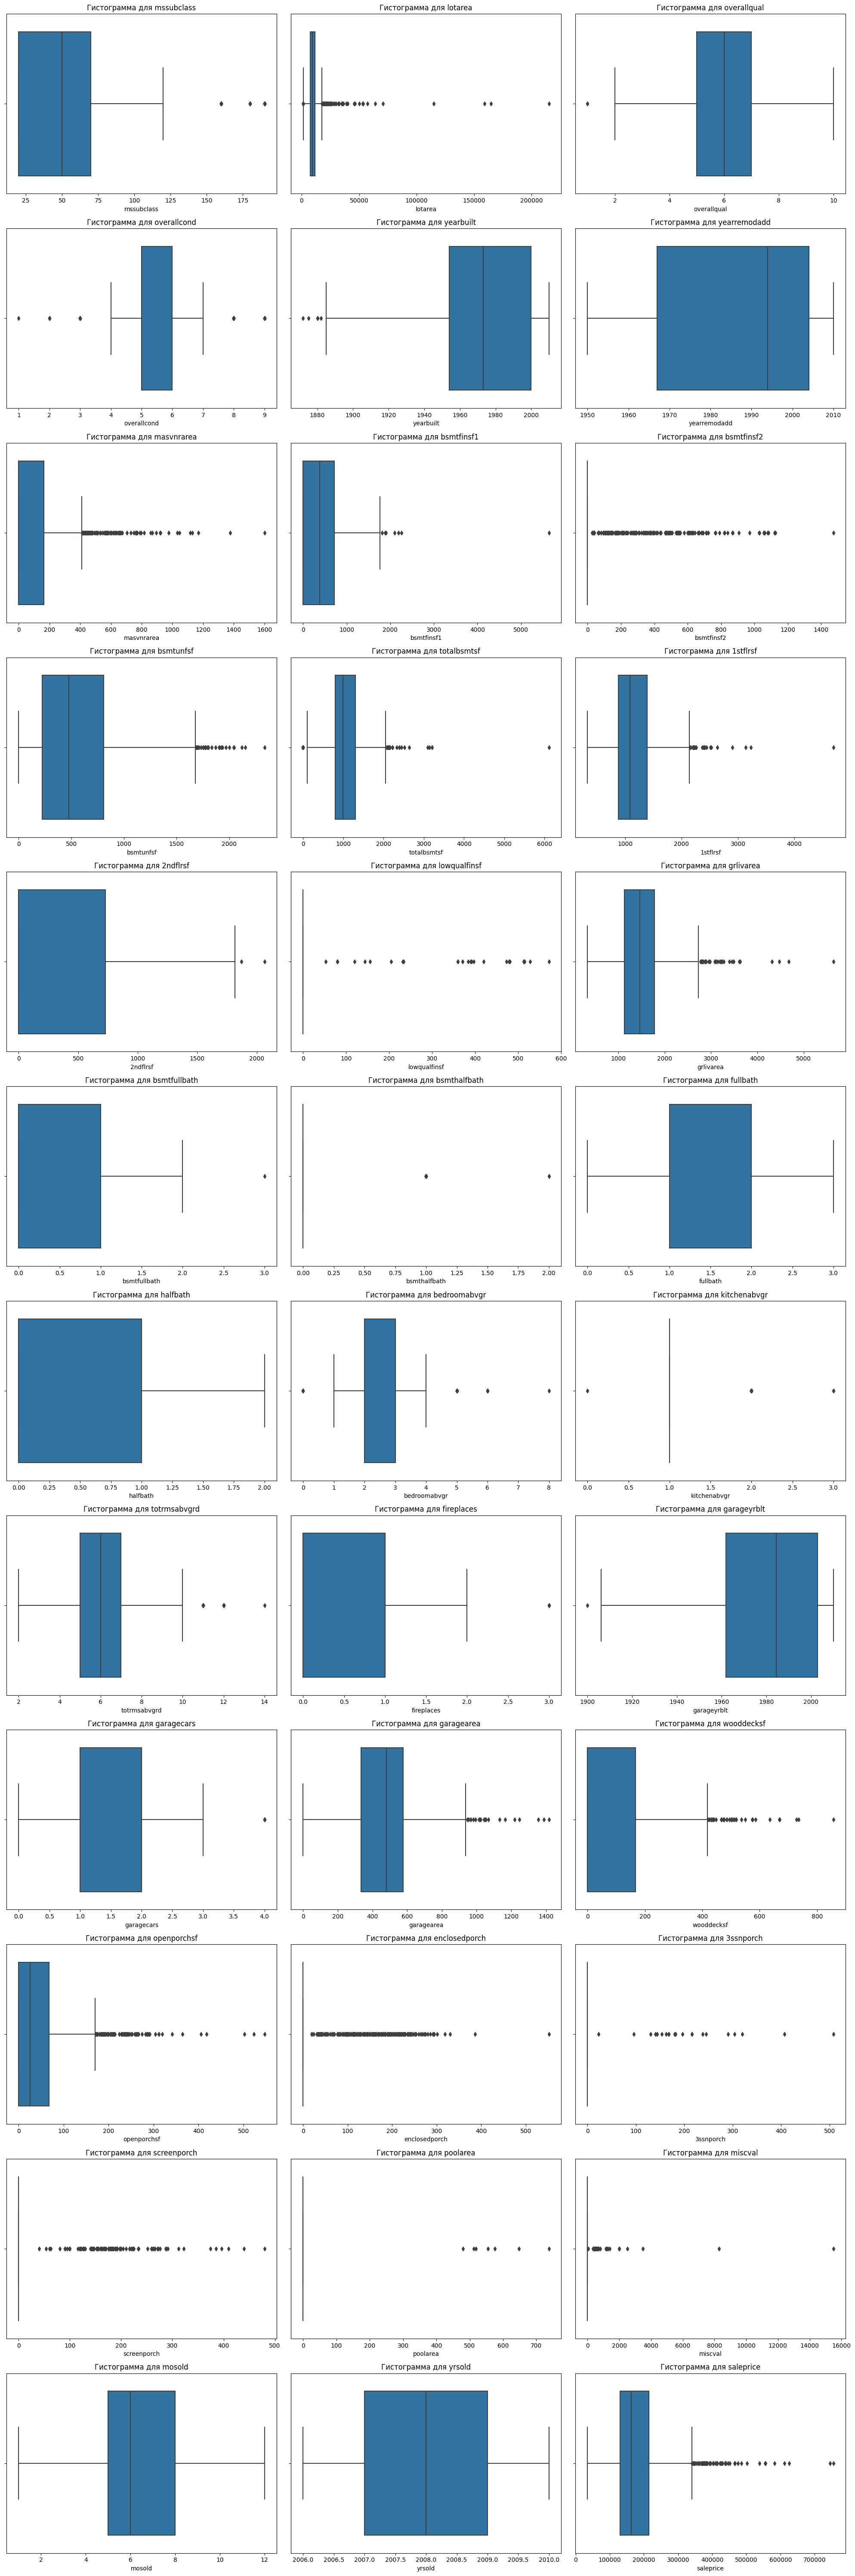

In [24]:
box_data(train, num_col)

In [25]:
label_encoder = LabelEncoder()


train_corr= train.copy()

train_corr[categorical_features] = train_corr[categorical_features].apply(label_encoder.fit_transform)

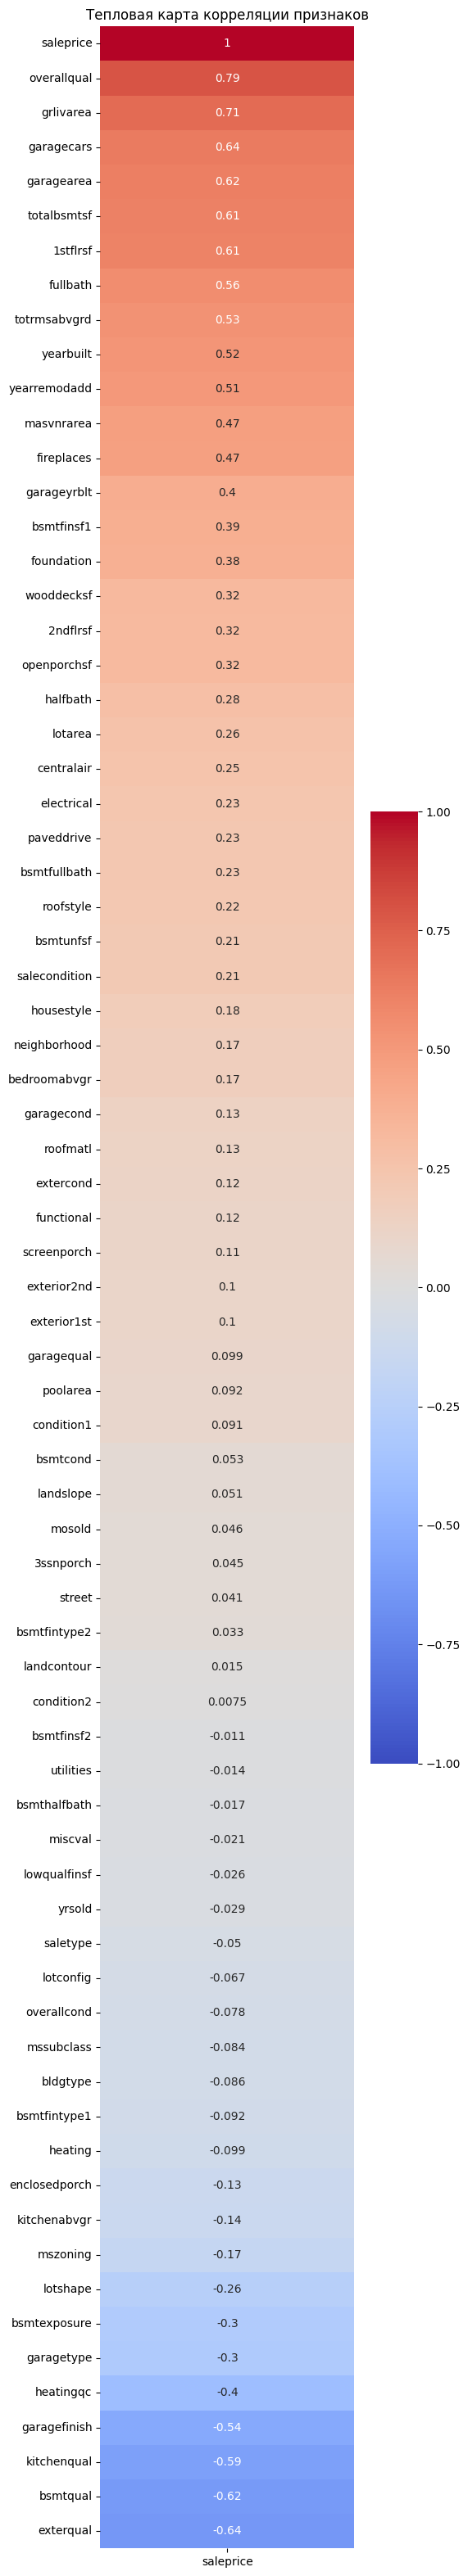

In [26]:
corr_matrix = train_corr.corr()

sorted_corr = corr_matrix['saleprice'].sort_values(ascending=False)

styled_corr = sorted_corr.to_frame().style.background_gradient(cmap='coolwarm')

plt.figure(figsize=(5, 40))

sns.heatmap(sorted_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Тепловая карта корреляции признаков')
plt.show()

In [27]:
threshold = 0.2

low_corr_features = corr_matrix.columns[corr_matrix['saleprice'].abs() < threshold].tolist()

print(f"Признаки с корреляцией меньше {threshold}: {len(low_corr_features)} шт." )
print(low_corr_features)

Признаки с корреляцией меньше 0.2: 37 шт.
['mssubclass', 'mszoning', 'street', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallcond', 'roofmatl', 'exterior1st', 'exterior2nd', 'extercond', 'bsmtcond', 'bsmtfintype1', 'bsmtfintype2', 'bsmtfinsf2', 'heating', 'lowqualfinsf', 'bsmthalfbath', 'bedroomabvgr', 'kitchenabvgr', 'functional', 'garagequal', 'garagecond', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saletype']


In [28]:
train.drop(low_corr_features, axis=1, inplace=True)
test.drop(low_corr_features, axis=1, inplace=True)


# Обучение

In [29]:
train.head()

,lotarea,lotshape,overallqual,yearbuilt,yearremodadd,roofstyle,masvnrarea,exterqual,foundation,bsmtqual,...,garagetype,garageyrblt,garagefinish,garagecars,garagearea,paveddrive,wooddecksf,openporchsf,salecondition,saleprice
0,8450,reg,7,2003,2003,gable,196,gd,pconc,gd,...,attchd,2003,rfn,2,548,y,0,61,normal,208500
1,9600,reg,6,1976,1976,gable,0,ta,cblock,gd,...,attchd,1976,rfn,2,460,y,298,0,normal,181500
2,11250,ir1,7,2001,2002,gable,162,gd,pconc,gd,...,attchd,2001,rfn,2,608,y,0,42,normal,223500
3,9550,ir1,7,1915,1970,gable,0,ta,brktil,ta,...,detchd,1998,unf,3,642,y,0,35,abnorml,140000
4,14260,ir1,8,2000,2000,gable,350,gd,pconc,gd,...,attchd,2000,rfn,3,836,y,192,84,normal,250000


In [30]:
random_state = 42

num_coll = train.drop('saleprice', axis=1).select_dtypes(include=['number']).columns.tolist()

cat_coll = train.drop('saleprice', axis=1).select_dtypes(include=['object', 'category']).columns.tolist()


MSE = make_scorer(mean_absolute_error)

X_train = train.drop('saleprice', axis=1)
y_train = train['saleprice']

X_test = test.drop('saleprice', axis=1)
y_test = test['saleprice']

In [31]:
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])


num_pipe = Pipeline([
    ('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler())
])


data_preprocessor = ColumnTransformer([
    ('num', num_pipe, num_coll),
    ('ohe', ohe_pipe, cat_coll)
])


pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=random_state))
])

In [32]:
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=random_state)],
        'models__max_depth': range(2, 15),
        'models__max_features': range(2, 15),
        'models__min_samples_leaf': range(2, 15),
        'models__min_samples_split': range(2, 15),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LinearRegression()],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]


In [33]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    error_score='raise',
    random_state=random_state,
    n_jobs=-1,
    n_iter=100
)

In [34]:
randomized_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown ca

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleImputer_num',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['lotarea',
                                                                                'overallqual',
                                                                                'yearbuilt',
                                                                                'yearremodadd',
                                                                                'masvnrarea',
                                                                                'bsmtfinsf1',
                                                                                'bsmtunfsf',
                                                                                'totalbsmtsf',
                                                                                '1stflrsf',
                                                                                '2ndflrsf',
                                                                                'grlivarea',
                                                                                'bs...
                                         'models__max_depth': range(2, 15),
                                         'models__max_features': range(2, 15),
                                         'models__min_samples_leaf': range(2, 15),
                                         'models__min_samples_split': range(2, 15),
                                         'preprocessor__num__scaler': [StandardScaler(),
                                                                       MinMaxScaler(),
                                                                       'passthrough']},
                                        {'models': [LinearRegression()],
                                         'preprocessor__num__scaler': [StandardScaler(),
                                                                       MinMaxScaler(),
                                                                       'passthrough']}],
                   random_state=42, scoring='neg_mean_squared_error')

In [35]:
best_score_neg_mse = randomized_search.best_score_
best_score_rmse = np.sqrt(-best_score_neg_mse)
print("Метрика лучшей модели RMSE:", round(best_score_rmse ** 0.5, 2))

Метрика лучшей модели RMSE: 201.52


In [36]:
best_model = randomized_search.best_estimator_

pred = best_model.predict(X_test)
print(f"Метрика тестовых данных RMSE: {round(mean_absolute_error(y_test, pred)**0.5, 2)}")

Метрика тестовых данных RMSE: 234.77
